# The Best Neighborhoods for Summer Fun in Pittsburgh
### By Group 33: Peter Ford, Nolan Grace, and Gabe Schmidt 

In the proceeding data driven argument, we will make the case that one neighborhood stands above the rest in regards to having summer fun in Pittsburgh. We will analyze the City's Playgrounds, Courts, and Parks to see which neighborhood possesses the best summer fun facilities.

In picking our data sets we also considered:
- Swimming Pools
- Public Art
- Fields

Despite these other good(or not so good) candidates, we landed on these three for their quality and max fun relation. Weighing each of the datasets with equal importance, we will then set out to determine which one can be considered the best.

## Playgrounds

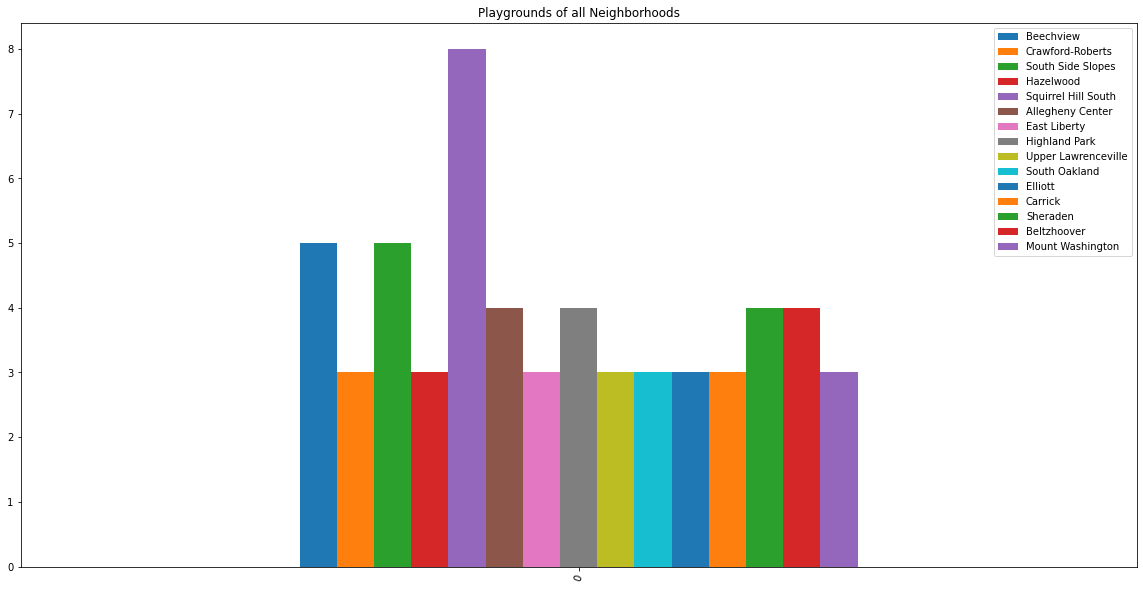

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot


pgs = pd.read_csv("Playgrounds.csv")
neighborhoods = {}
for index, row in pgs.iterrows():
    hood = row['neighborhood']
    if(neighborhoods.get(hood, -1) == -1):
        neighborhoods[hood] = 1
    else:
        neighborhoods[hood] += 1
#neighborhoods
neighborDf = pd.DataFrame([neighborhoods])

for col in neighborDf.columns:
    if neighborDf[col].values[0] < 3:
        del neighborDf[col]

neighborDf.plot.bar(rot= 70, title="Playgrounds of all Neighborhoods", figsize = (20, 10))

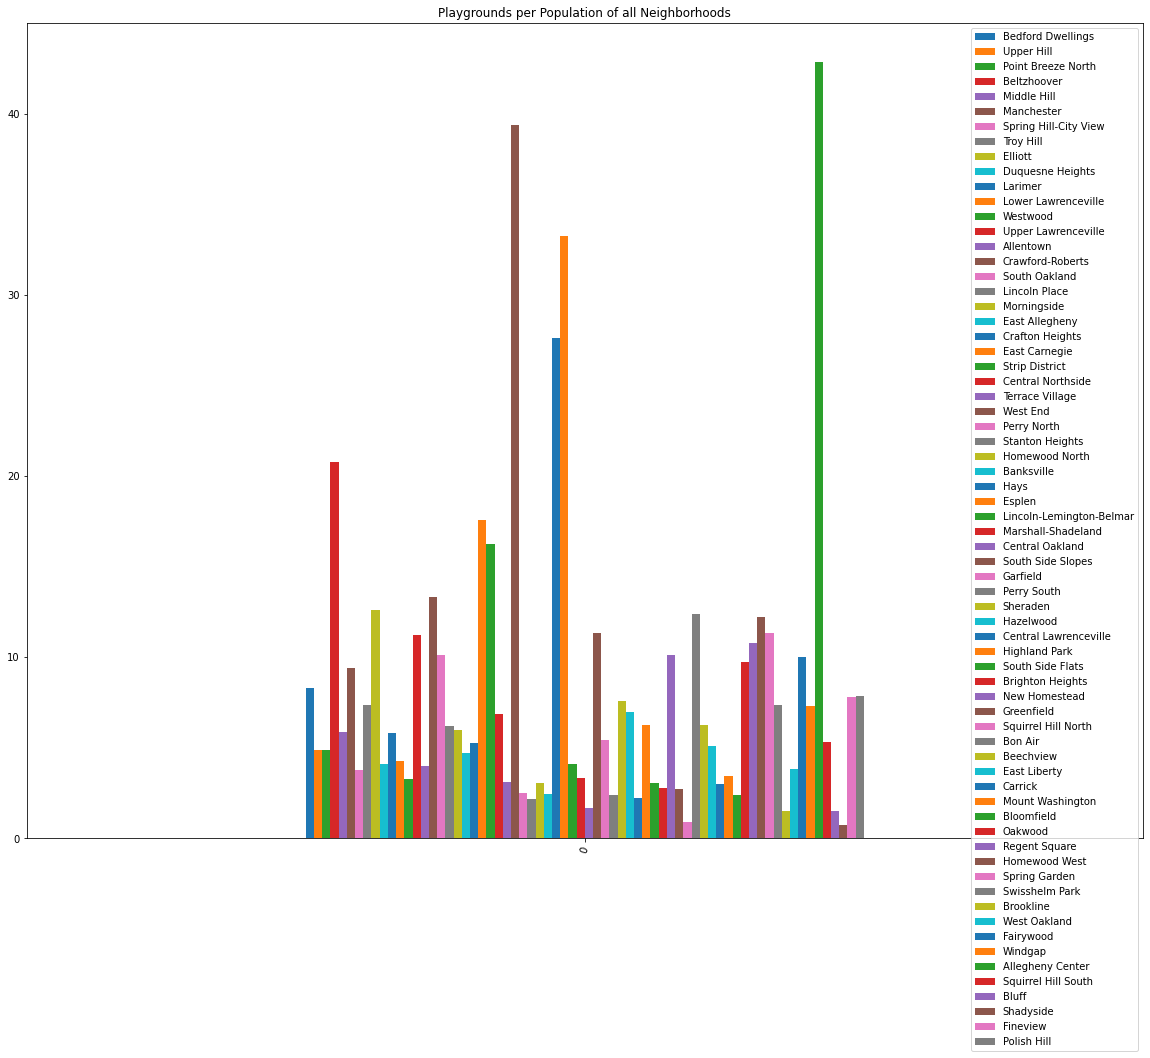

In [4]:
npl = pd.read_csv("NeighborhoodPopulation.csv")

metricDict = {}
for index, row in npl.iterrows():
    hood = row['Neighborhood']
    pop = row['Population (2010)']
    pop = pop.replace(",", "")
    if neighborhoods.get(hood) is not None:
        PPP = (neighborhoods.get(hood)/int(pop)) * 10000 #PPP = playgrounds per population
        metricDict[hood] = PPP
    
pppDf = pd.DataFrame([metricDict])

pppDf.plot.bar(rot= 70, title="Playgrounds per Population of all Neighborhoods", figsize = (20, 15))

In [5]:

pppDf.sort_values(by = 0, axis = 1, ascending = False)


,Allegheny Center,West End,Esplen,Hays,Beltzhoover,East Carnegie,Strip District,Crawford-Roberts,Elliott,Bon Air,...,Banksville,Perry South,Bloomfield,Central Lawrenceville,Stanton Heights,Central Oakland,Bluff,Brookline,Squirrel Hill North,Shadyside
0,42.872454,39.370079,33.222591,27.624309,20.779221,17.54386,16.233766,13.297872,12.599748,12.376238,...,2.413127,2.412545,2.369107,2.231147,2.173441,1.643115,1.515152,1.513546,0.880049,0.718649


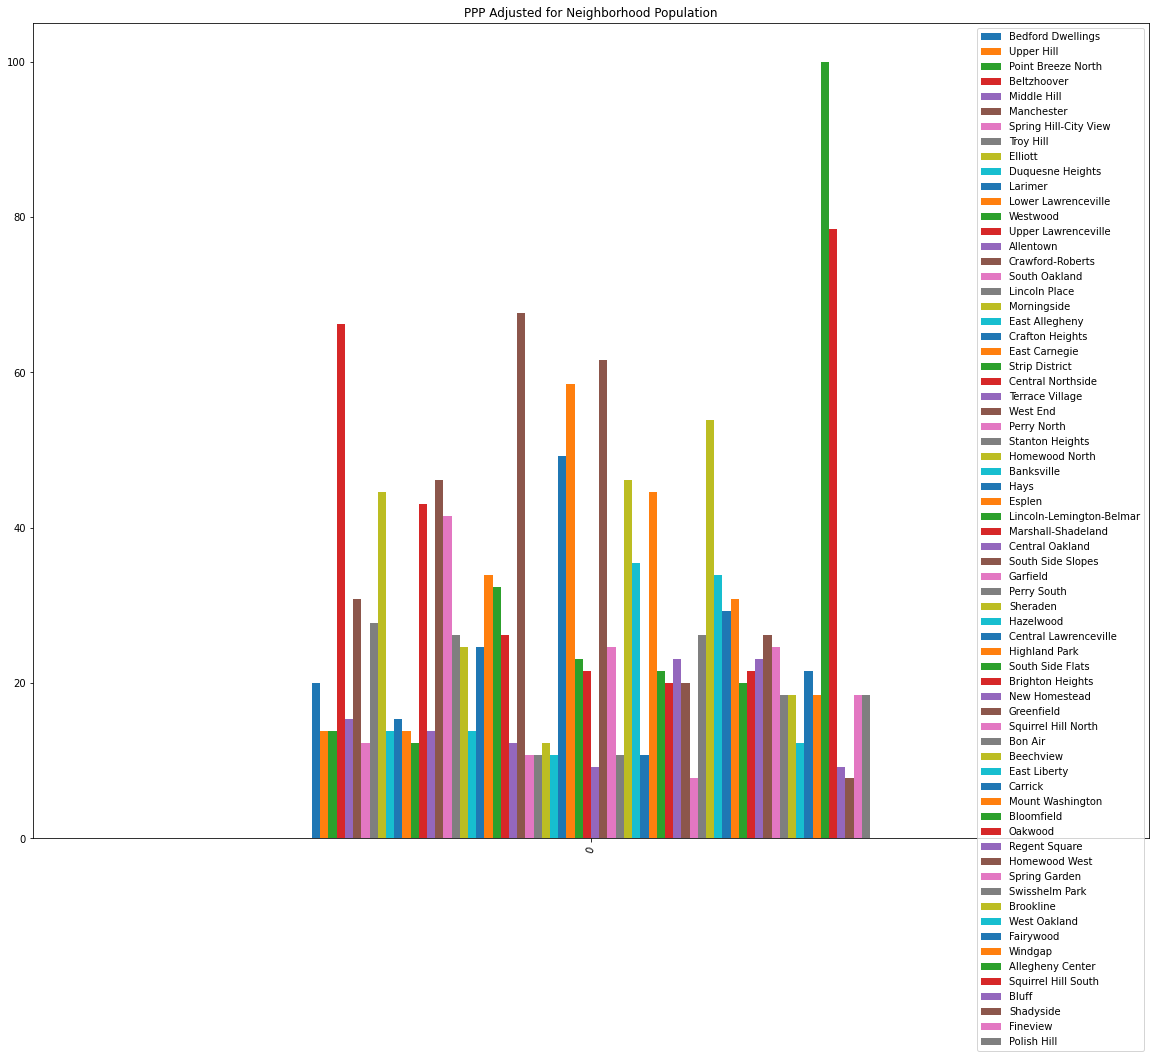

In [10]:
comboMetric = {}

for col in pppDf.columns:
    if neighborhoods.get(col) is not None:
        comboMetric[col] = ((int(neighborhoods.get(col) * pppDf.median(axis = 1)) + int(pppDf[col].values[0]))/65)*100

        
combo = pd.DataFrame([comboMetric])

combo.plot.bar(rot= 70, title="PPP Adjusted for Neighborhood Population", figsize = (20, 15))


In [13]:
for col in combo.columns:
    if combo[col].values[0] < 22:
        #print(col + ": " + str(combo[col].values[0]))
        del(combo[col])

combo.sort_values(by = 0, axis = 1, ascending = False)

,Allegheny Center,Squirrel Hill South,West End,Beltzhoover,South Side Slopes,Esplen,Beechview,Hays,Sheraden,Crawford-Roberts,...,Lincoln Place,Homewood West,Bon Air,Spring Garden,Garfield,Crafton Heights,Morningside,Regent Square,New Homestead,Lincoln-Lemington-Belmar
0,100.0,78.461538,67.692308,66.153846,61.538462,58.461538,53.846154,49.230769,46.153846,46.153846,...,26.153846,26.153846,26.153846,24.615385,24.615385,24.615385,24.615385,23.076923,23.076923,23.076923


At the top, these are mostly a mixture of neighborhoods that had both a good PPP and a good total number of playgrounds in the neighborhood. The neighborhoods that were much better in only one category managed to make it to the top, but the top five of the final metric awarded the most balanced neighborhoods like Allegheny Center and Beltzhoover. Squirrel Hill South, a neighborhood who had a very high total amount of playgrounds(8), but a relatively low PPP, managed to make it to the top five. Although not a great balance, this spot is deserved as it stood head and shoulders above the other neighborhoods in the first aspect of the combo metric. The opposite is true for a neighborhood like West End. Despite only having one playground, West End snuck into the three spot due to it only having around 250 people residing in it. 

In conclusion, the top five best playground neighborhoods are:
1. Allegheny Center
2. Squirrel Hill South
3. West End
4. Beltzhoover
5. South Side Slopes



## Courts

The Top 5 Neighborhoods for Courts and Rinks Are
Brookline :  9
Hazelwood :  10
Squirrel Hill South :  23
Highland Park :  20
Beltzhoover :  9

The Top 5 Neighborhoods for Courts and Rinks rated out of 100
Brookline :  39.130434782608695
Hazelwood :  43.47826086956522
Squirrel Hill South :  100.0
Highland Park :  86.95652173913044
Beltzhoover :  39.130434782608695


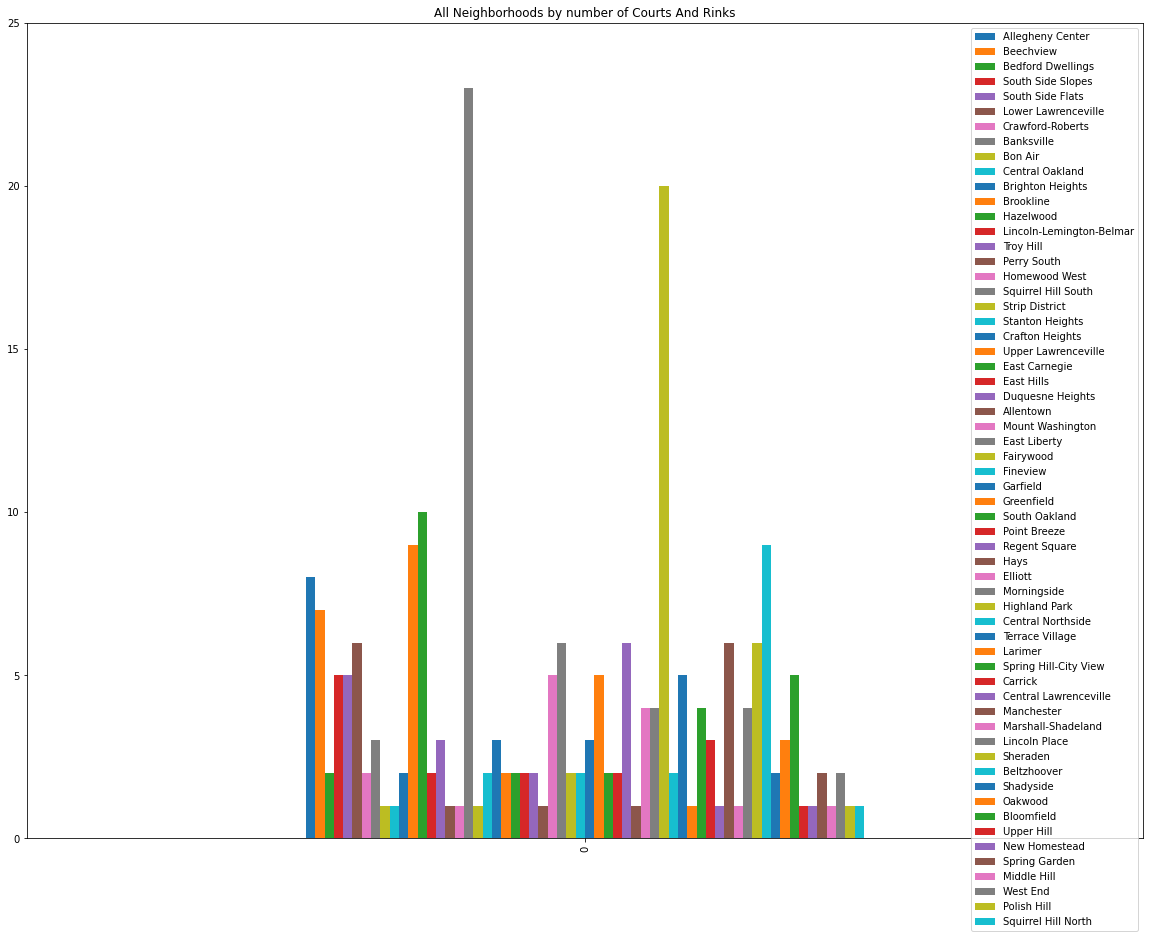

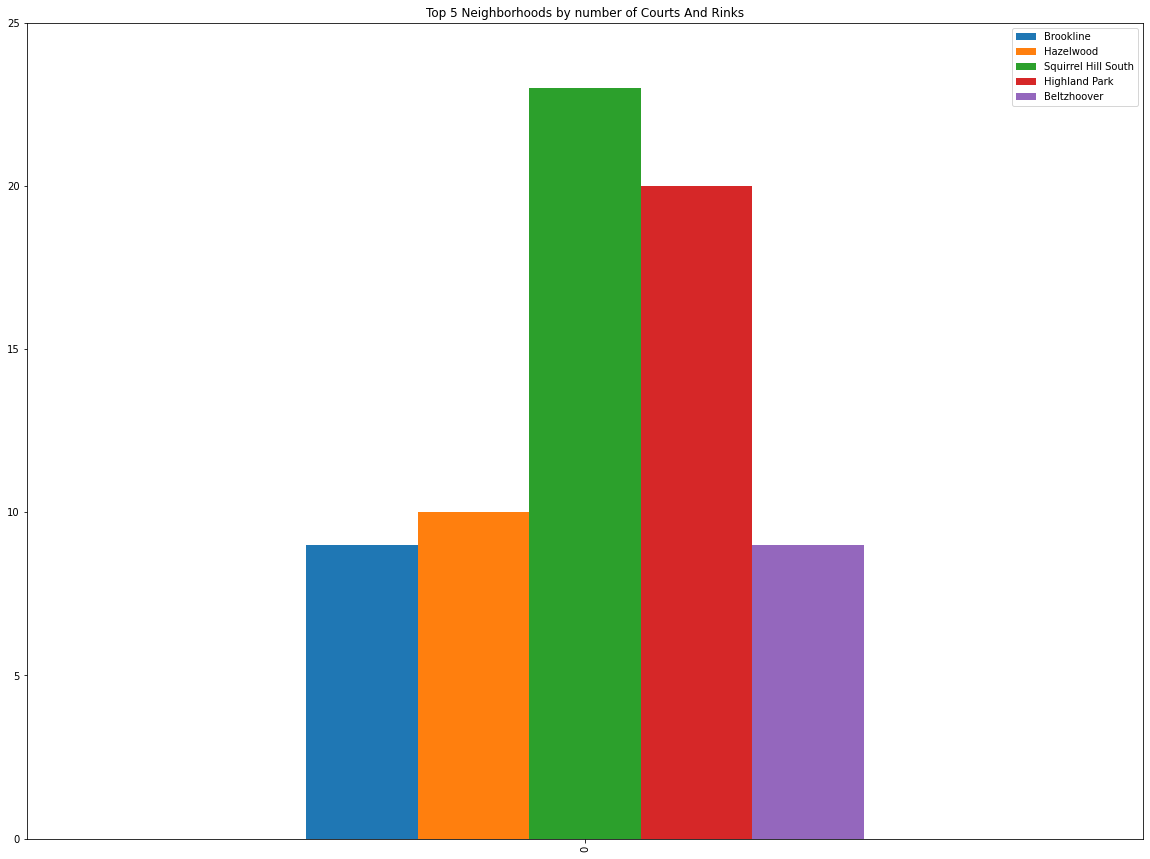

In [6]:
import pandas as pd

count = {}
top = {}
car = pd.read_csv("courtAndRink.csv", index_col = "id")

for index,row in car.iterrows():
    nh = row['neighborhood']
    if(row['inactive'] == 'f'):
        if(nh in count):
            count[nh] = count[nh] + 1
        else:
            count[nh] = 1
            
            
print("The Top 5 Neighborhoods for Courts and Rinks Are")
for nh in count:
    if(count[nh] > 8):
        print(nh, ": ", count[nh])
        top[nh] = count[nh]
        
        
print()
print("The Top 5 Neighborhoods for Courts and Rinks rated out of 100")
for nh in count:
    if(count[nh] > 8):
        print(nh, ": ", 100*count[nh]/23)
        
pd.DataFrame([count]).plot.bar(title="All Neighborhoods by number of Courts And Rinks", figsize = (20, 15) , ylim=(0,25))
pd.DataFrame([top]).plot.bar(title="Top 5 Neighborhoods by number of Courts And Rinks", figsize = (20, 15) , ylim=(0,25))

## Parks

{'Beechview': 100.0, 'South Side Slopes': 100.0, 'Hazelwood': 83.33333333333333, 'Troy Hill': 83.33333333333333, 'East Liberty': 66.66666666666667, 'Mount Washington': 83.33333333333333, 'Elliott': 66.66666666666667, 'Marshall-Shadeland': 66.66666666666667, 'Sheraden': 66.66666666666667}


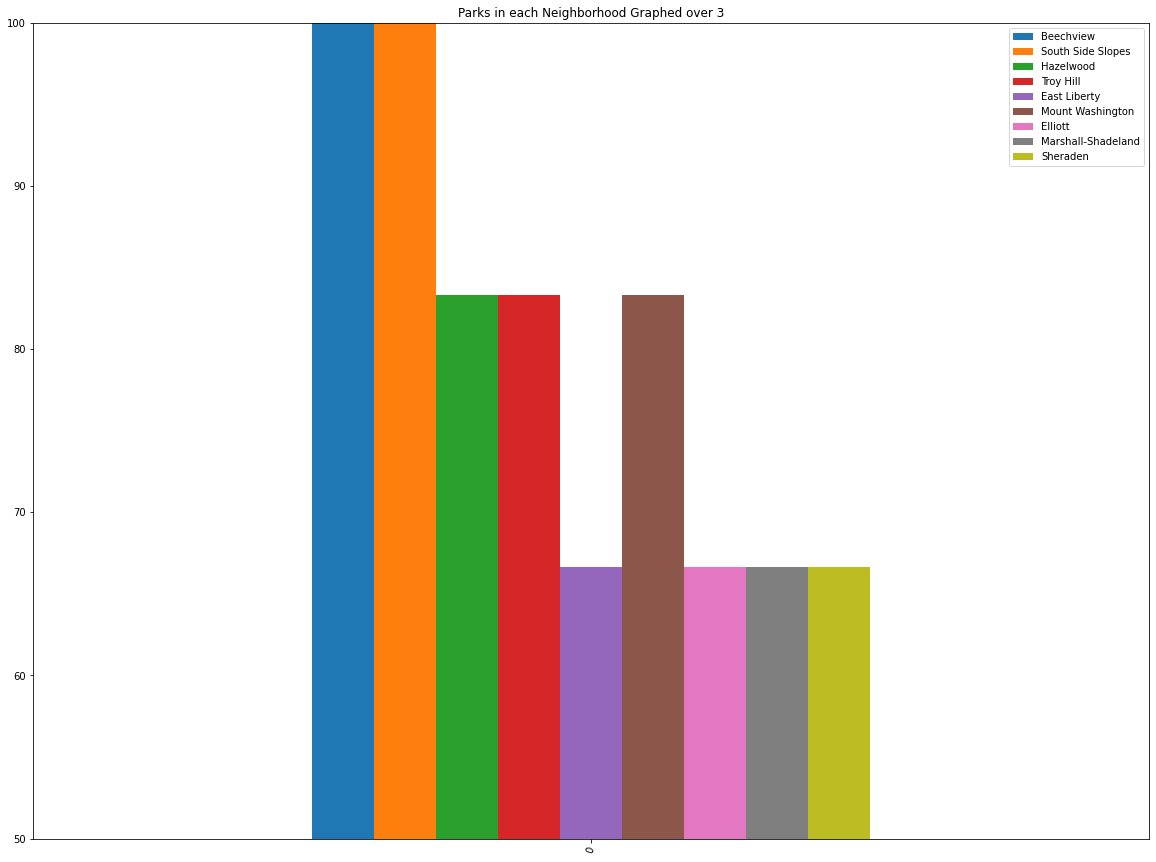

In [15]:
import pandas as pd

##Pittsburgh_City-parks.cvs is from https://data.wprdc.org/dataset/parks
##Imports Pittsburgh_City-Parks.cvs as a dataframe parks
## Only grabs the Collums Name & Neighborhood, as they are all that will be relevant to my usage
parks = pd.read_csv("Pittsburgh_City-Parks.csv", usecols = ["name","type","neighborhood"])


neighToNoOfParks = {}


for index, row in parks.iterrows():
    if row["type"] == "Park":
        key = row["neighborhood"]
        if not(key in neighToNoOfParks.keys()):
            neighToNoOfParks[key] = 100
        else:
            neighToNoOfParks[key]+=100
    
for key in neighToNoOfParks.keys():
    neighToNoOfParks[key] /= 6
            
largeNeighToNoOfParks = {}
for key in neighToNoOfParks.keys():
    if neighToNoOfParks[key] > 50:
        largeNeighToNoOfParks[key] = neighToNoOfParks[key]

pd.DataFrame([largeNeighToNoOfParks]).plot.bar(rot= 70, title="Parks in each Neighborhood Graphed over 3", figsize = (20, 15) , ylim=(50,100))

print(largeNeighToNoOfParks)

## Parks Conclusions
From my own metric of simply number of parks I would conclude that the best neighborhood to have summertime Fun in would be a draw between Beechveiw and Southside Slopes.
While I do not factor population in to this that is with good reason, those a near neighborhoods often take advantage of parks in other neighborhoods so I am simply look at the absolute number of parks.
The Whole of the top five is
1. Beechview
1. Southside Slopes
3. Hazelwood
3. Troy Hill
3. Mount Washington

# Conclusions

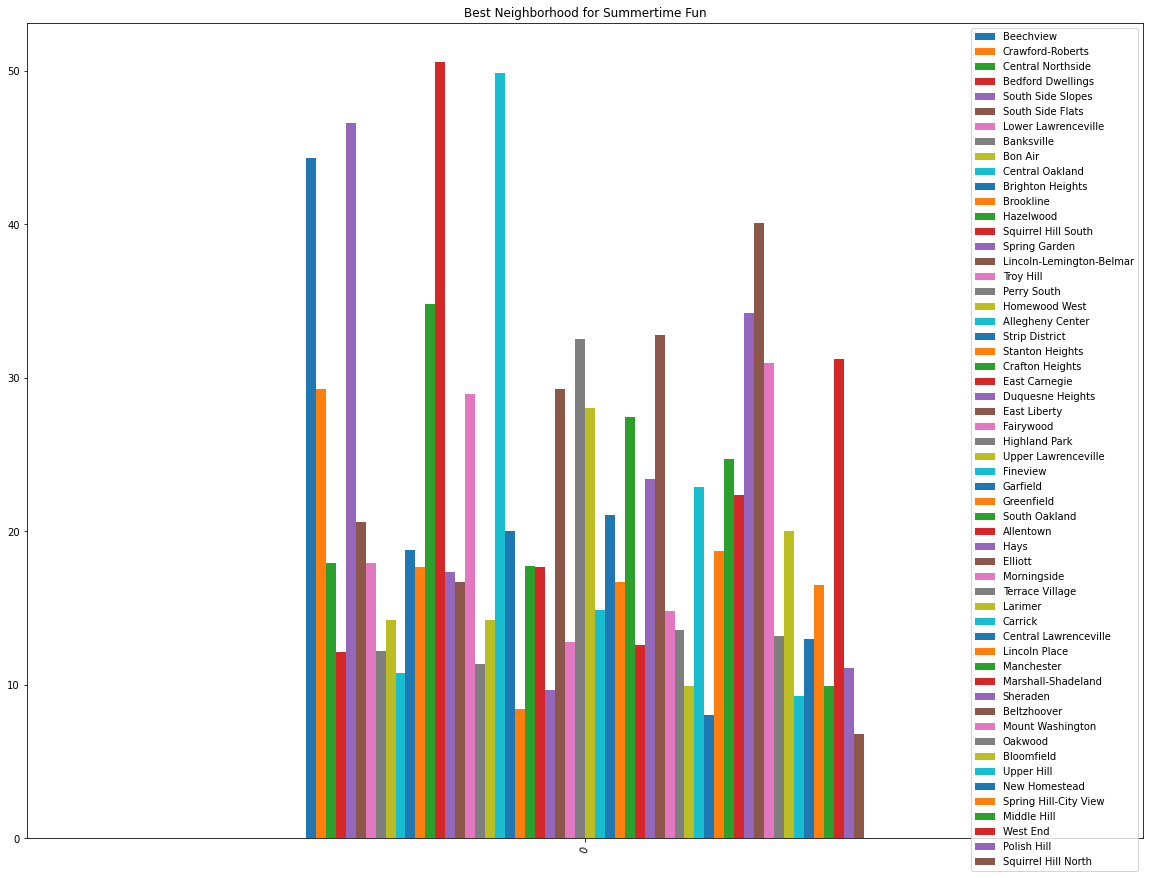

In [19]:
finMetric = {}
for hood in neighborhoods:
    if (neighToNoOfParks.get(hood) is not None) and (comboMetric.get(hood) is not None)  and (count.get(hood) is not None):
        finMetric[hood] = (neighToNoOfParks[hood]*.2 + count[hood]*.4 + comboMetric[hood]*.4)
finDf = pd.DataFrame([finMetric])

finDf.plot.bar(rot= 70, title="Best Neighborhood for Summertime Fun", figsize = (20, 15))

In [20]:

finDf.sort_values(by = 0, axis = 1, ascending = False)

,Squirrel Hill South,Allegheny Center,South Side Slopes,Beechview,Beltzhoover,Hazelwood,Sheraden,Elliott,Highland Park,West End,...,Perry South,Polish Hill,Central Oakland,Larimer,Middle Hill,Duquesne Heights,Upper Hill,Stanton Heights,Central Lawrenceville,Squirrel Hill North
0,50.584615,49.866667,46.615385,44.338462,40.061538,34.820513,34.194872,32.779487,32.512821,31.210256,...,11.374359,11.117949,10.758974,9.887179,9.887179,9.671795,9.271795,8.441026,8.041026,6.810256


# Squirrel Hill South is the Best Neighborhood
### (for summertime fun)
Followed by:
- Allegheny Center
- Southside Slopes
- Beechview
- Beltzhoover

To calculate what this best neighborhood is, we assigned a weighting of 40% to the courts and playgrounds metric, and a weighting of 20% to the parks. Our reasoning behind this was that, while parks are more important as a whole than just courts or playgrounds, courts and playgrounds determine the quality of a park. In our park metric, we simply count the amount of parks in each neighborhood, which is and important consideration, but this does not account for how big or small a park may be. This is reflected in our metric, as the top neighborhood was Squirrel Hill South. Although squirrel hill south only contains two parks, one of them is Schenley park which is one of the largest parks in all of Pittsburgh. This is reflected in the neighborhood's ranking in the courts and playgrounds metric. All together, these three metrics come together to paint as well of a picture as they can of which neighborhood would be ideal for enjoying outdoor activity in the summer. 